In [52]:
import awkward as ak
import uproot
import numpy as np
from coffea.nanoevents import NanoEventsFactory, PFNanoAODSchema

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5

In [53]:
sample = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/QCD_Pt470to600.root"

In [54]:
events = NanoEventsFactory.from_root(
    {sample:"/Events"},
    schemaclass=PFNanoAODSchema,
).events()

In [76]:
events.FatJet.fields

['area',
 'btagCSVV2',
 'btagDDBvLV2',
 'btagDDCvBV2',
 'btagDDCvLV2',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'particleNet_mass',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'nConstituents',
 'DDX_tau1_flightDistance2dSig',
 'DDX_tau1_trackEtaRel_0',
 'DDX_tau1_trackEt

In [56]:
events= events[:12000]

In [58]:
fatjets = events.FatJet

candidatejet = fatjets[(fatjets.pt > 450)
                       & (abs(fatjets.eta) < 2.5)
                       #& fatjets.isTight
                      ]

leadingjets = candidatejet 

In [59]:
#len(ak.flatten(leading.jets))

In [60]:
import fastjet

In [61]:
jetdef = fastjet.JetDefinition(
        fastjet.cambridge_algorithm, 0.8
    )

pf = ak.flatten(leadingjets.constituents.pf,axis=1)
# cluster = fastjet.ClusterSequence(pf, jetdef)
softdrop_zcut10_beta0 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=0)

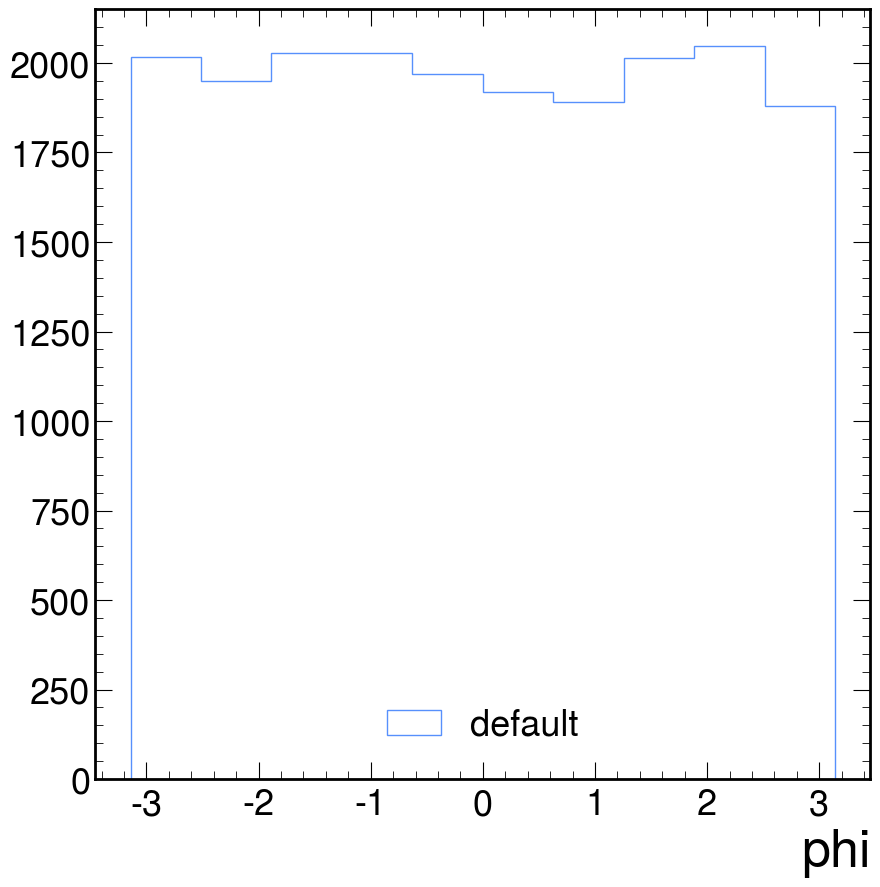

In [84]:
#bins=np.linspace(0,300,30)
plt.hist(ak.flatten(leadingjets.phi.compute()),histtype='step',label='default');
#plt.hist(softdrop_zcut10_beta0.phi,histtype='step',label='recalculated');
plt.legend(frameon=False)
plt.xlabel('phi')
plt.legend()

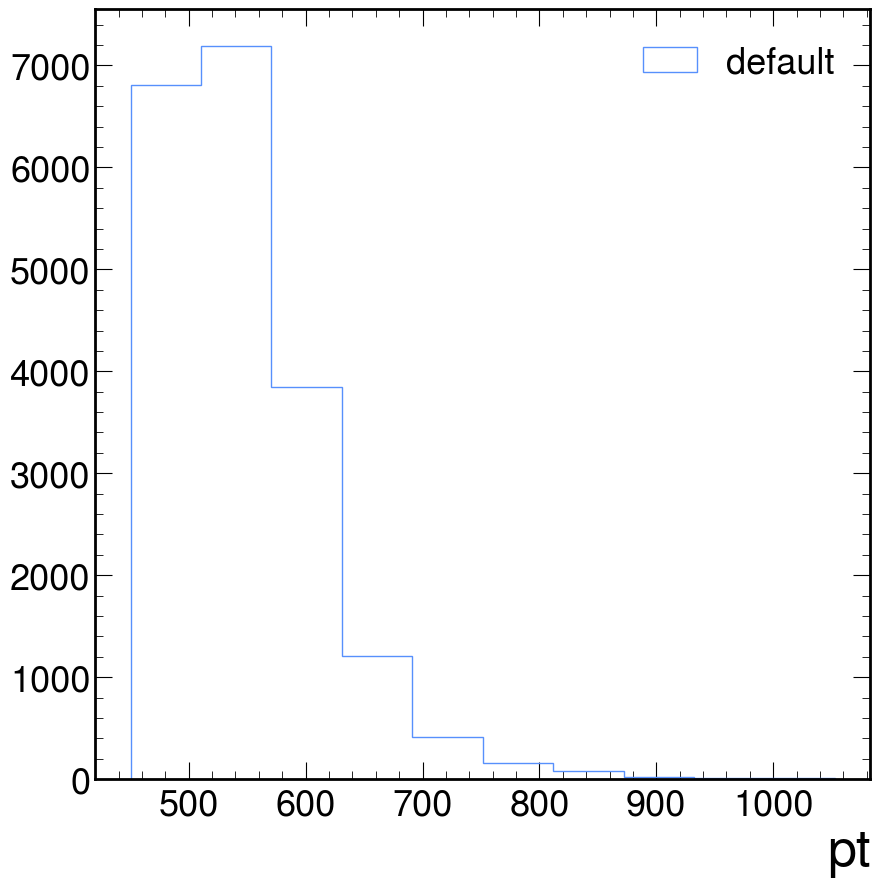

In [85]:
#bins=np.linspace(0,300,30)
plt.hist(ak.flatten(leadingjets.pt.compute()),histtype='step',label='default');
#plt.hist(softdrop_zcut10_beta0.phi,histtype='step',label='recalculated');
plt.legend(frameon=False)
plt.xlabel('pt')
plt.legend()

In [113]:
softdrop_zcut10_beta1 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=1)

In [114]:
softdrop_zcut10_beta2 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=2)

In [115]:
softdrop_zcut10_beta3 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=-0.5)

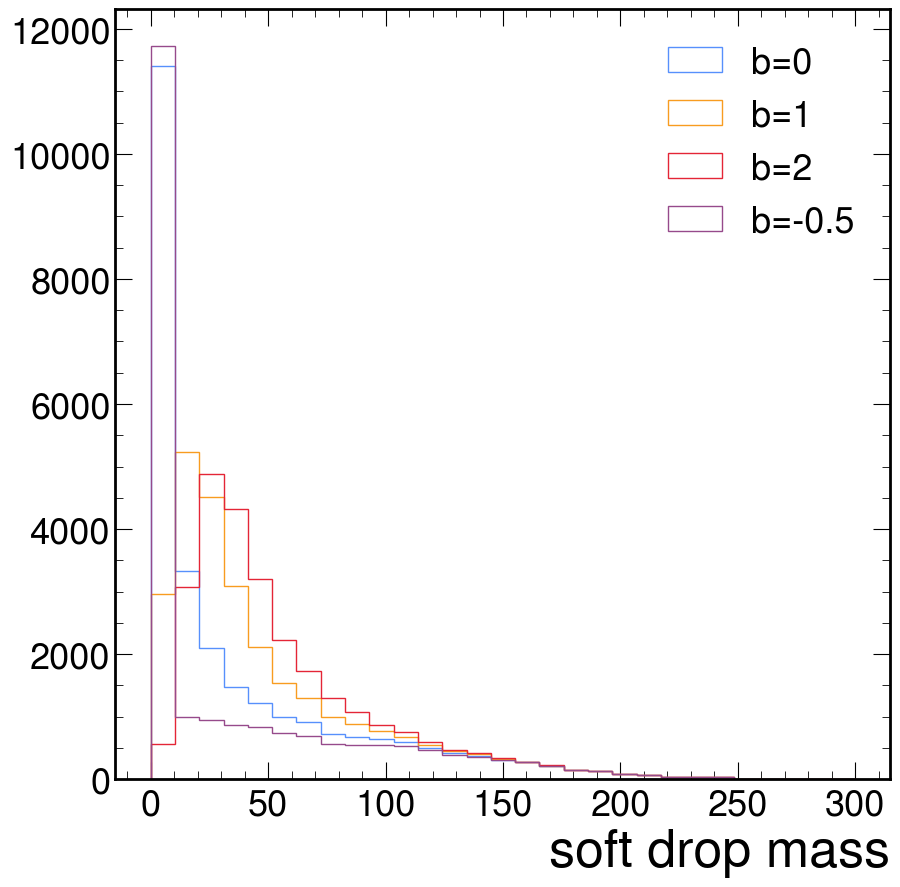

In [116]:
bins=np.linspace(0,300,30)
#plt.hist(ak.flatten(leadingjets.msoftdrop.compute()),histtype='step',bins=bins,label='default');
plt.hist(softdrop_zcut10_beta0.msoftdrop.compute(),histtype='step',bins=bins,label='b=0');
plt.hist(softdrop_zcut10_beta1.msoftdrop.compute(),histtype='step',bins=bins,label='b=1');
plt.hist(softdrop_zcut10_beta2.msoftdrop.compute(),histtype='step',bins=bins,label='b=2');
plt.hist(softdrop_zcut10_beta3.msoftdrop.compute(),histtype='step',bins=bins,label='b=-0.5');

plt.legend(frameon=False)
plt.xlabel('soft drop mass')
plt.legend()

In [63]:
# softdrop = cluster.exclusive_jets_softdrop_grooming()
# softdrop_cluster= fastjet.ClusterSequence(softdrop.constituents, jetdef)

In [96]:
softdrop_zcut10_beta0_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta0.constituents, jetdef)

In [97]:
n2 = softdrop_zcut10_beta0_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

In [104]:
softdrop_zcut10_beta1_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta1.constituents, jetdef)

In [105]:
n2b = softdrop_zcut10_beta1_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

In [107]:
softdrop_zcut10_beta2_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta2.constituents, jetdef)

In [108]:
n2b2 = softdrop_zcut10_beta2_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

In [110]:
softdrop_zcut10_beta3_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta3.constituents, jetdef)

In [111]:
n2b3 = softdrop_zcut10_beta3_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

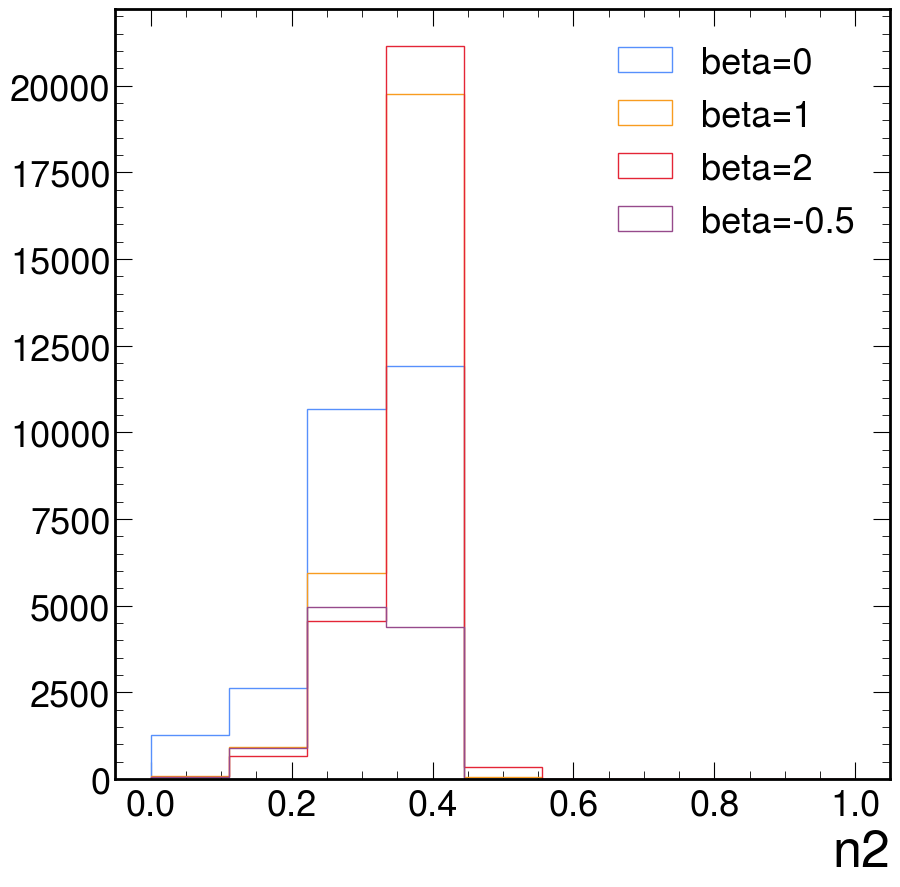

In [112]:
bins=np.linspace(0,1,10)
#plt.hist(ak.flatten(leadingjets.n2b1.compute()), histtype='step', label='default', bins = bins);
plt.hist(n2.compute(), histtype='step', label = 'beta=0', bins=bins)
plt.hist(n2b.compute(), histtype='step', label= 'beta=1', bins= bins)
plt.hist(n2b2.compute(), histtype='step', label = 'beta=2', bins=bins)
plt.hist(n2b3.compute(), histtype='step', label= 'beta=-0.5', bins= bins)

plt.legend(frameon=False)
plt.xlabel('n2')
plt.legend()